In [13]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [11]:
train_df = pd.read_csv("data\sign_mnist_train\sign_mnist_train.csv")
test_df = pd.read_csv("data\sign_mnist_test\sign_mnist_test.csv")

In [12]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [25]:
train_df.shape

(27455, 785)

In [27]:
y_train = train_df["label"]
X_train = train_df.drop(labels=["label"],axis=1)

y_test = test_df["label"]
X_test = test_df.drop(labels=["label"],axis=1)

y_train.shape,X_train.shape, X_test.shape, y_test.shape,

((27455,), (27455, 784), (7172, 784), (7172,))

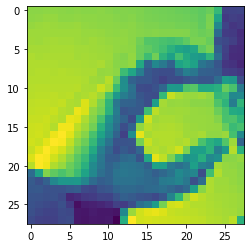

Label:  2


In [44]:
img = X_train.iloc[3].values
reshaped = img.reshape(28,28)
plt.imshow(reshaped)
plt.show()
print("Label: ", y_train.iloc[3])